In [1]:
# Foundations of Data Mining - Practical Task 1
# Version 2.0 (2023-11-02)
###############################################
# Template for a notebook that clusters pixel data of a given image.
# This file does not have to be changed in order to complete the task.
# That being said, you MAY change it. However, your implementation has 
# to work with the original version of this file.

import cv2  # for image loading
import numpy as np  # general library for numerical and scientific computing
import matplotlib.pyplot as plt  # for plotting the images

# For testing purposes ONLY(!), you may uncomment the following two import statements.
# Use them to see how the program is supposed to work with your implementation and 
# what kind of content the variables should have.
# Comment out or delete these imports before you submit your code!
# from sklearn.cluster import KMeans
# from sklearn.cluster import DBSCAN

# Importing your own implementation:
from clustering_algorithms import CustomKMeans as KMeans
from clustering_algorithms import CustomDBSCAN as DBSCAN

# Loading an image (replace filename if you want):
image_path = 'giraffe.png'
image = cv2.imread(image_path)

# Reducing the size of the image, so that DBSCAN runs in a reasonable amount of time:
# small_image is 0.5x the size of the original. You may change this value.
image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

height, width, _ = image.shape
pixel_data = image.reshape(-1, 3)

In [2]:
# k-means
# Setting hyperparameter(s):
k = 4

# Performing the clustering:
kmeans = KMeans(n_clusters=k)
kmeans_labels = kmeans.fit_predict(pixel_data)

In [3]:
# DBSCAN
# Setting hyperparameter(s):
eps = 5
min_pts = 30

# Performing the clustering:
dbscan = DBSCAN(eps=eps, min_samples=min_pts)
dbscan_labels = dbscan.fit_predict(pixel_data)

In [4]:
# Getting average cluster colors for each clustering:
# (In theory, we can also use the centroids from k-means as average colors.
# Here we ignore that for the sake of a unified method.)
for cl_name, cl_labels in (('kmeans', kmeans_labels), ('dbscan', dbscan_labels)):
    cluster_centers = {}
    cluster_counts = {}
    
    for i, label in enumerate(cl_labels):
        if label not in cluster_centers:
            cluster_centers[label] = [0, 0, 0]
            cluster_counts[label] = 0
        
        cluster_centers[label] = [sum(x) for x in zip(cluster_centers[label], pixel_data[i])]
        cluster_counts[label] += 1
    
    for label in cluster_centers:
        cluster_centers[label] = [x / cluster_counts[label] for x in cluster_centers[label]]
    
    # Creating a new image with the cluster centers as pixel values:
    new_image = np.array([cluster_centers[label] for label in cl_labels], dtype=np.uint8)
    new_image = new_image.reshape(height, width, 3)
    _ = cv2.imwrite(f'{cl_name}_output.jpg', new_image)

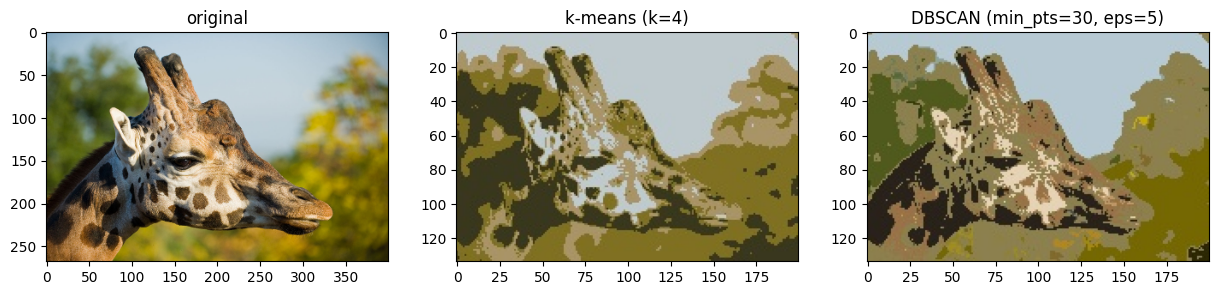

In [5]:
# Displaying the images:
plt.figure(figsize=(15, 5)) 

# Original image:
image1 = cv2.imread(image_path)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('original')

# k-means image:
image2 = cv2.imread('kmeans_output.jpg')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title(f'k-means ({k=})')

# DBSCAN image:
image3 = cv2.imread('dbscan_output.jpg')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title(f'DBSCAN ({min_pts=}, {eps=})')

plt.show()